In [ ]:
import rosbag

bags_base_dir = 'data/20230818_Bahnhofstrasse_Dodo/mission_data/dodo_mission_2023_08_19/2023-08-19-19-40-19/'
bag_path_npc = bags_base_dir + '2023-08-19-19-40-19_anymal-d020-lpc_0.bag'

bag = rosbag.Bag(bag_path_npc)
bag


In [3]:
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'any_msgs/ExtendedJointState': '393848425e33688e4c3305d16bf0a6f6', 'anydrive_msgs/ReadingsExtended': '0a2a4253e6a31287c7260e6c1257e961', 'anymal_msgs/AnymalState': '1bee66925f9d04663ad1cd7f4a496f93', 'geometry_msgs/PoseStamped': 'd3812c3cbc69362b77dc0b19b345f8f5', 'geometry_msgs/PoseWithCovarianceStamped': '953b798c0f514ff060a53a3498ce6246', 'geometry_msgs/TwistStamped': '98d34b0043a2093cf9d9345ab6eef12e', 'geometry_msgs/TwistWithCovarianceStamped': '8927a1a12fb2607ceea095b2dc440a96', 'geometry_msgs/Vector3Stamped': '7b324c7325e683bf02a9b14b01090ec7', 'geometry_msgs/WrenchStamped': 'd78d3cb249ce23087ade7e7d0c40cfa7', 'joy_manager_msgs/AnyJoy': 'e3287e28a1bdbd3254c9f98faef92113', 'nav_msgs/Odometry': 'cd5e73d190d741a2f92e81eda573aca7', 'pdb_msgs/BatteryState': '34966cc7873049316245e9259d326300', 'pdb_msgs/IntrinsicState': '585b8ed96759eece246333e77f3b2922', 'pdb_msgs/PowerStates': '8cf5c8a7c8399f4e56dcdf20f7bae500', 'robot_utils_ros/ForceCalibratorCommands

In [4]:
# list topics
topics = [topic for topic in bag.get_type_and_topic_info().topics]
for topic in sorted(topics):
    print(topic)

/anyjoy/rcu
/anymal_low_level_controller/actuator_readings
/anymal_low_level_controller/actuator_readings_extended_throttled
/depth_camera_front_lower/depth/camera_info
/depth_camera_front_lower/depth/image_rect_raw
/depth_camera_front_lower/point_cloud_self_filtered
/depth_camera_front_upper/depth/camera_info
/depth_camera_front_upper/depth/image_rect_raw
/depth_camera_front_upper/point_cloud_self_filtered
/depth_camera_rear_lower/depth/camera_info
/depth_camera_rear_lower/depth/image_rect_raw
/depth_camera_rear_lower/point_cloud_self_filtered
/depth_camera_rear_upper/depth/camera_info
/depth_camera_rear_upper/depth/image_rect_raw
/depth_camera_rear_upper/point_cloud_self_filtered
/motion_reference/command_pose
/motion_reference/command_twist
/pdb/battery_state
/pdb/intrinsic_state
/pdb/power_state
/sensors/battery_voltage
/sensors/imu
/state_estimator/actuator_readings
/state_estimator/anymal_state
/state_estimator/contact_force_lf_foot
/state_estimator/contact_force_lh_foot
/state_e

480 848 16UC1 0 1696
(480, 848)


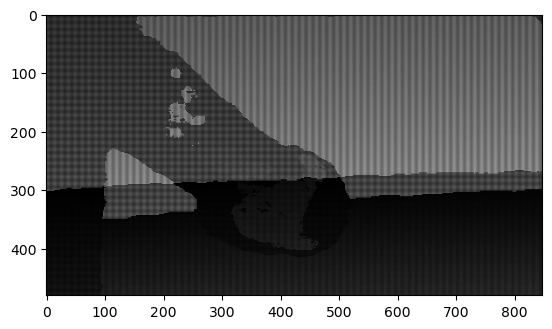

In [68]:
from matplotlib import pyplot as plt
import numpy as np
from cv_bridge import CvBridge

msgs_depth = bag.read_messages(topics=['/depth_camera_rear_lower/depth/image_rect_raw'])

# iterate for 1000 setps
for i in range(1000):
    next(msgs_depth)

_, msg, _ = next(msgs_depth)



print(msg.height, msg.width, msg.encoding, msg.is_bigendian, msg.step)

bridge = CvBridge()
cv_image = bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough")
print(cv_image.shape)  # (480, 640)

image = np.array(cv_image, dtype=np.float32)
plt.imshow(image, cmap='gray')




header: 
  seq: 0
  stamp: 
    secs: 1692466820
    nsecs: 303993449
  frame_id: "imu_link"
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0
orientation_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
angular_velocity: 
  x: 0.0001259068672653439
  y: -0.00013036160499764335
  z: 0.0004969897484367084
angular_velocity_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
linear_acceleration: 
  x: 0.42193599743408206
  y: 0.6604881479663086
  z: -9.825283848669432
linear_acceleration_covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(22000.0, 23000.0)

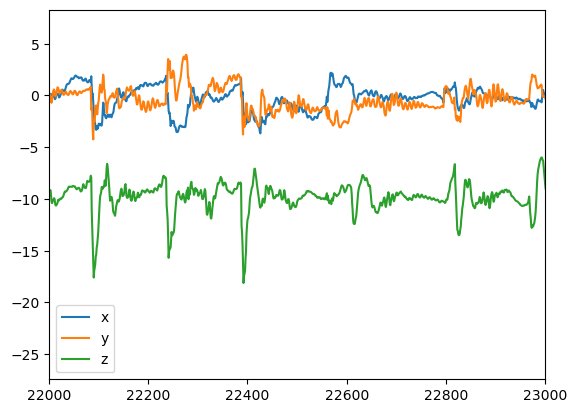

In [74]:
msgs = bag.read_messages(topics=['/sensors/imu'])

msg = next(msgs)
print(msg[1])

# create plot with (msg.angular_velocity.x, msg.angular_velocity.y, msg.angular_velocity.z)

linear_acceleration = []
angular_velocity = []
for _, msg, _ in msgs:
    angular_velocity.append([msg.angular_velocity.x, msg.angular_velocity.y, msg.angular_velocity.z])
    linear_acceleration.append([msg.linear_acceleration.x, msg.linear_acceleration.y, msg.linear_acceleration.z])

plt.plot(linear_acceleration)
plt.legend(['x', 'y', 'z'])
plt.xlim(22_000, 23_000)


header: 
  seq: 141
  stamp: 
    secs: 1692466834
    nsecs: 760666569
  frame_id: "base"
twist: 
  linear: 
    x: 0.03333333544798345
    y: -0.0
    z: 0.0
  angular: 
    x: 0.0
    y: 0.0
    z: 0.0


(0.0, 500.0)

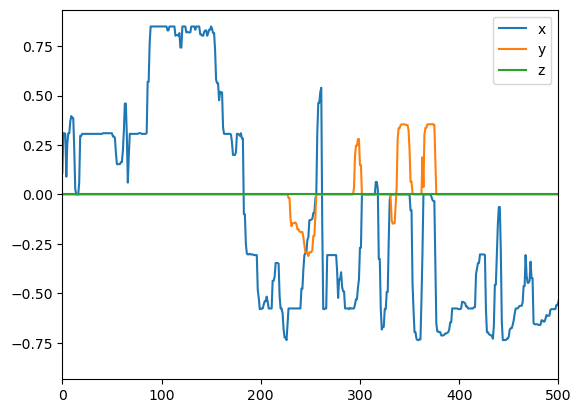

In [58]:

msgs = bag.read_messages(topics=['/twist_mux/rcu'])

axes = []

_, msg, _ = next(msgs)
print(msg)

for _, msg, _ in msgs:
    axes.append([msg.twist.linear.x, msg.twist.linear.y, msg.twist.linear.z])
    
plt.plot(axes)
plt.legend(['x', 'y', 'z'])
plt.xlim(0, 500)

header: 
  seq: 5431
  stamp: 
    secs: 1692466820
    nsecs: 436138433
  frame_id: "odom"
child_frame_id: "base"
pose: 
  pose: 
    position: 
      x: 0.015519952330472271
      y: -0.02772731190868951
      z: 0.45242510391489726
    orientation: 
      x: 0.03307306754349869
      y: 0.020937550335055698
      z: -0.0032314525532439508
      w: 0.9992283767505936
  covariance: [0.0004014831230933333, 2.1022315932497174e-07, 3.3284659801294877e-09, -4.159864324878782e-08, 7.133922947181692e-06, 3.670933058684044e-05, 2.102231593248922e-07, 0.0004012673248810036, 1.7930130612092636e-07, -7.765509482724493e-06, 4.059338752430644e-08, 7.202878505208868e-06, 3.3284659800404058e-09, 1.7930130612093147e-07, 0.0003954969943884505, -2.7363755513763595e-07, 1.2663740009609365e-08, -1.1724175269198914e-07, -4.159864324878768e-08, -7.765509482724488e-06, -2.7363755513771044e-07, 1.1489636692997672e-05, -3.0219617455590034e-08, -9.038389023860938e-07, 7.133922947181693e-06, 4.059338752430872e

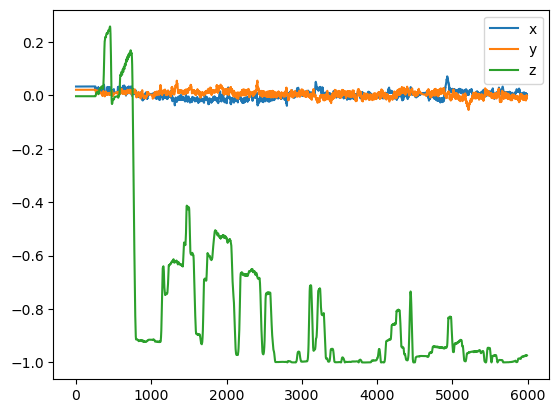

In [63]:


# /state_estimator/odometry

msgs = bag.read_messages(topics=['/state_estimator/odometry'])

position = []

_, msg, _ = next(msgs)
print(msg)

for _, msg, _ in msgs:
    position.append([msg.pose.pose.orientation.x, msg.pose.pose.orientation.y, msg.pose.pose.orientation.z])
    
plt.plot(position)
plt.legend(['x', 'y', 'z'])


In [64]:

# /state_estimator/anymal_state

msgs = bag.read_messages(topics=['/state_estimator/anymal_state'])

_, msg, _ = next(msgs)
print(msg)

header: 
  seq: 0
  stamp: 
    secs: 1692466820
    nsecs: 306186742
  frame_id: "odom"
state: 0
pose: 
  header: 
    seq: 0
    stamp: 
      secs: 1692466820
      nsecs: 306186742
    frame_id: "odom"
  pose: 
    position: 
      x: 0.015503253098389944
      y: -0.02774428760759565
      z: 0.4524251485283035
    orientation: 
      x: 0.033080160237799694
      y: 0.020934552263197587
      z: -0.0032280061895546353
      w: 0.9992282159227797
twist: 
  header: 
    seq: 0
    stamp: 
      secs: 1692466820
      nsecs: 306186742
    frame_id: "base"
  twist: 
    linear: 
      x: -0.0001771323974720676
      y: -7.943818284196406e-06
      z: 0.000497578272968436
    angular: 
      x: -4.5250472405863006e-05
      y: 9.772638700192135e-05
      z: 0.00018795910615347207
joints: 
  header: 
    seq: 0
    stamp: 
      secs: 1692466820
      nsecs: 306186742
    frame_id: ''
  name: - LF_HAA
- LF_HFE
- LF_KFE
- RF_HAA
- RF_HFE
- RF_KFE
- LH_HAA
- LH_HFE
- LH_KFE
- RH_HAA
- RH

header: 
  seq: 0
  stamp: 
    secs: 1692466820
    nsecs: 486184727
  frame_id: "base"
twist: 
  twist: 
    linear: 
      x: 0.00022431220169745795
      y: -8.756205520985793e-05
      z: 0.0004395884430176845
    angular: 
      x: 0.00043233912338991136
      y: 1.932989233600472e-06
      z: 0.0004255485111850366
  covariance: [0.00020154144058579307, 2.1687323104522312e-07, 1.8400380718618409e-06, -2.17569421672976e-08, 6.237569344489583e-06, -2.9074402760841447e-07, 2.1687323104522288e-07, 0.0002054297100970448, -2.701944634935628e-06, -6.886658836039348e-06, 1.3797780814826367e-08, -1.7646991889838693e-07, 1.84003807186184e-06, -2.701944634935629e-06, 0.00015845624402825332, 3.886466858071547e-07, 1.0570786596718504e-07, 6.942387627322192e-09, -2.175694216729757e-08, -6.88665883603935e-06, 3.8864668580715466e-07, 3.6248325175877334e-06, -4.563626670673512e-09, -1.4630951708509055e-08, 6.237569344489583e-06, 1.3797780814826437e-08, 1.0570786596718526e-07, -4.563626670673496e-

(2000.0, 2200.0)

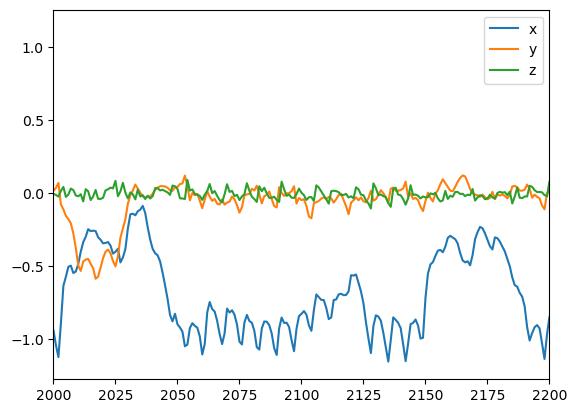

In [73]:
# /state_estimator/twist_throttle

msgs = bag.read_messages(topics=['/state_estimator/twist_throttle'])

_, msg, _ = next(msgs)
print(msg)

twist = []
for _, msg, _ in msgs:
    twist.append([msg.twist.twist.linear.x, msg.twist.twist.linear.y, msg.twist.twist.linear.z])
    
plt.plot(twist)
plt.legend(['x', 'y', 'z'])
plt.xlim(2000, 2200)
